# Plotting a Double Pendulum

This notebook solves and plots a double pendulum using the Hamiltonian method given a set of initial conditions. It uses the `solve_ivp` function in solving the differentual equations.  The details of the equations used are outlined below.

For a double pendulum, we can model cartesian coordinates of the pendulum masses as:

$x_1 = L_1\sin\phi_1 \hspace{27 mm} y_1 = -L_1\cos\phi_1 \\ 
x_2 = L_1\sin\phi_1+L_2\sin\phi_2 \hspace{5 mm} y_2 = -L_1\cos\phi_1-L_2\cos\phi_2$

Where $x_1$ and $y_1$ are the coordinates of the first pendulum with mass $m_1$ and lenght $L_1$ and $x_2$ and $y_2$ are the coordinates of the second pendulum with mass $m_2$ and length $L_2$.



From Taylor Equation 11.37, the total potential energy of our system is

$U(\phi_1, \phi_2)=(m_1+m_2)gL_1(1-\cos\phi_1)+m_2gL_2(1-\cos\phi_2)$.

Taylor Equation 11.38 shows us the total kinetic energy is

$ T = \frac{1}{2}(m_1+m_2)L_1^2\dot\phi_1^2+m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2)+\frac{1}{2}m_2L_2^2\dot\phi_2^2 $.

From this we can express our Lagrangian equation as


$\begin{align}
  \mathcal{L} &= T - U\\
              &= \frac{1}{2}(m_1+m_2)L_1^2\dot\phi_1^2+m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2)+\frac{1}{2}m_2L_2^2\dot\phi_2^2 - (m_1+m_2)gL_1(1-\cos\phi_1)-m_2gL_2(1-\cos\phi_2)
\end{align}$


Thus, our Hamiltonian can be expressed as

$\begin{align}
    \mathcal{H} &= \phi_i p_i-\mathcal{L} \\
                &=\frac{1}{2}(m_1+m_2)L_1^2\phi_1^2+\frac{1}{2} m_2L_2^2\dot\phi_2+m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2)-(m_1+m_2)gL_1\cos\phi_1-m_2gL_2\cos\phi_2
\end{align}$

But to actually solve this, we will need the differential equations for $\dot\phi_1$, $\dot\phi_2$, $\dot p_{\phi_1}$, and $\dot p_{\phi_2}$.

These are given by the following:





$\dot\phi_1 = \frac{\delta\mathcal{H}}{\delta p_{\phi_1}} = \frac{L_2 p_{\phi_1}-L_1 p_{\phi_2} \cos(\phi_1-\phi_2)}{L_1^2 L_2[m_1+m_2*\sin^2(\phi_1- \phi_2)]}\\                                    
\dot\phi_2 = \frac{\delta\mathcal{H}}{\delta p_{\phi_2}} = \frac{L_1 (m_1+m_2) p_{\phi_2} - L_2 m_2 p_{\phi_1} \cos(\phi_1 - \phi_2)}{L_1 L_2^2 [m_1+m_2*\sin^2(\phi_1- \phi_2)]}$

$\dot p_{\phi_1} = -\frac{\delta \mathcal{H}}{\delta \phi_1} = -(m_1 + m_2) g L_1 \sin(\phi_1) -  \frac{p_{\phi_1} p_{\phi_1} \sin(\phi_1 - \phi_2)}{L_1 L_2 [m_1 + m_2 \sin^2(\phi_1 - \phi_2)]} +               \frac{L_2^2 m_2 p_{\phi_1}^2+L_1^2(m_1+m_2) p_{\phi_2}^2-2 L_1 L_2 m_2 p_{\phi_1} p_{\phi_2} \cos(\phi_1-\phi_2)}{2 L_1^2 L_2^2[m_1+m_2\sin^2(\phi_1-\phi_2)]}\cdot \sin(2[\phi_1-\phi_2])\\$
$\dot p_{\phi_2} = -\frac{\delta \mathcal{H}}{\delta \phi_2} = -m_2 g L_2 \sin(\phi_2) +                         \frac{p_{\phi_1} p_{\phi_1} \sin(\phi_1 - \phi_2)}{L_1 L_2 [m_1 + m_2 \sin^2(\phi_1 - \phi_2)]} -                 \frac{L_2^2 m_2 p_{\phi_1}^2+L_1^2(m_1+m_2) p_{\phi_2}^2-2 L_1 L_2 m_2 p_{\phi_1} p_{\phi_2} \cos(\phi_1-\phi_2)}{2 L_1^2 L_2^2[m_1+m_2\sin^2(\phi_1-\phi_2)]}\cdot\sin(2[\phi_1-\phi_2])$







These differential equations are the ones that we will use in our class `DP`. `DP` takes the input for the inital $\phi_1$, $\phi_2$, $p_{\phi_1}$, and $p_{\phi_2}$. By returning the above differential equations in the `dy_dt` function in `DP`, we are able to return values from `solve_ivp` for our $\phi$'s  as a function of time.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt


In [3]:
#change font sizes
font_size = 14
plt.rcParams.update({'font.size': font_size})


In [4]:
class DP(): #D is for double, P is for Pendulum
    
    def __init__(self, L1=1., L2 = 1., m1=1., m2= 1., Jack=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.Jack = Jack #Jack represents gravity due to how attractive he is
        
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand sides of Hamilton's eqs
        [dq1/dt dq2/dt dp1/dt dp2/dt] --> [dphi_1/dt dphi_2/dt dp_phi_1/dt dp_phi_2/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t), y[1] = phi_1(t), y[2] = p_phi_1(t), y[3] = p_phi_3(t)
            
        Returns
        -------
        theta1_dot : float
                     time derivate of the theta1 value passed into y
        theta2_dot : float
                     time derivate of the theta2 value passed into y
        p1_dot : float
                 time derivative of p1 value passed into y
        p2_dot : float
                 time derivative of p2 value passed into y         
        """
        
        
        theta1, theta2, p1, p2 = y      #This assigns the values passed to y to specific variables we use later
        
        c = np.cos(theta1-theta2)       #These are factors that appear repeatedly in the equations of
        s = np.sin(theta1 - theta2)     #the time derivatives and are defined here to make the equations simpler.
        d = self.m1+ self.m2* s**2        
        con1 = (p1*p2*s)/(self.L1*self.L2*d)
        con2 = (self.L2**2 * self.m2 * p1**2 + self.L1**2 * (self.m1 + self.m2)* p2**2 \
                - 2. * self.L1 * self.L2 * self.m2 * p1 * p2 * c) * np.sin(2. * (theta1-theta2)) \
                /(2. * self.L1**2 *self.L2**2 * d**2)
        
        
        
        ##These are our time derivatives of theta1, theta2, p1, and p2 that we passed into y.
        theta1_dot = (self.L2*p1-self.L1*p2*c) / ((self.L1**2)*self.L2*d)       
        
        theta2_dot = (self.L1*(self.m1+self.m2)*p2-self.L2*self.m2*p1*c)/(self.L1*(self.L2**2)*d)  
        
        p1_dot = -(self.m1+self.m2)*self.Jack*self.L1*np.sin(theta1)-con1+con2
        
        p2_dot = -self.m2 * self.Jack * self.L2 * np.sin(theta2) + con1 - con2
        
        
        
        return theta1_dot, theta2_dot, p1_dot, p2_dot
    
    def solve_ode(self, t_pts, phi1_0, phi2_0, p_phi1_0, p_phi2_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi2_0, p_phi1_0, p_phi2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        q1, q2, p1, p2 = solution.y

        return q1, q2, p1, p2
    

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line


In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index


In [7]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
p_phi_vs_time_labels = (r'$t$', r'$p_\phi(t)$')
phase_space_labels = (r'$\phi$', r'$p_\phi$')
log_phi_vs_time_labels = (r'$t$', r'$\log \left | \Delta\phi_1 \right |$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#Below some initial conditions regarding the physical properties of the pendulum are defined. 
#These are not the starting positions of the pendulums.

L1 = 1.  #Length of pendulum 1
L2 = 1.  #Length of pendulum 2
m1 = 1.  #mass of pendulum 1
m2 = 1.  #mass of pendulum 2
Jack = 1. #gravity

# Instantiate the pendulum
P1 = DP(L1=L1, L2 = L2, m1 = m1, m2 = m2, Jack = Jack)


In [8]:
#This will be for the first set of initial conditions

phi1a_0 = np.pi/2 #Initial phi_1
phi1a_dot_0 = 0.0 #Initial velocity of phi_1

phi2a_0 = np.pi/2 #Initial phi_2
phi2a_dot_0 = 0.0 #Initial velocity of phi_2


#These give the initial momentum of the pendulums.  If the velocities initially are 0, these will be 0. 
p_phi1a_0 = (P1.m1+P1.m2)*P1.L1**2*phi1a_dot_0 + P1.m2*P1.L1*P1.L2*phi2a_dot_0*np.cos(phi1a_0-phi2a_0)
p_phi2a_0 = P1.m2*P1.L2**2*phi2a_dot_0 + P1.m2*P1.L1*P1.L2*phi1a_dot_0*np.cos(phi1a_0-phi2a_0)

#And their results.  These are arrays that correspond to 
phi1_1, phi2_1, p_phi1_1, p_phi2_1 = P1.solve_ode(t_pts, phi1a_0, phi2a_0, p_phi1a_0, p_phi2a_0)




#This will be the second set of initial conditions.  These will be used to demonstrate chaos, as we are
#changning the phi_1 and phi_2 from above by 0.001.

phi1b_0 = phi1a_0+0.001
phi1b_dot_0 = 0.0

phi2b_0 = phi2a_0+0.001
phi2b_dot_0 = 0.0

p_phi1b_0 = (P1.m1+P1.m2)*P1.L1**2*phi1b_dot_0 + P1.m2*P1.L1*P1.L2*phi2b_dot_0*np.cos(phi1b_0-phi2b_0)
p_phi2b_0 = P1.m2*P1.L2**2*phi2b_dot_0 + P1.m2*P1.L1*P1.L2*phi1b_dot_0*np.cos(phi1b_0-phi2b_0)

#And their results
phi1_2, phi2_2, p_phi1_2, p_phi2_2 = P1.solve_ode(t_pts, phi1b_0, phi2b_0, p_phi1b_0, p_phi2b_0)

#Difference between the phi_1's and phi_2's from the 2 sets of initial conditions
diff_phi1 = abs(phi1_1 - phi1_2)
diff_phi2 = abs(phi2_1 - phi2_2)


(<matplotlib.axes._subplots.AxesSubplot at 0x1513109cf8>,
 <matplotlib.lines.Line2D at 0x151313d5f8>)

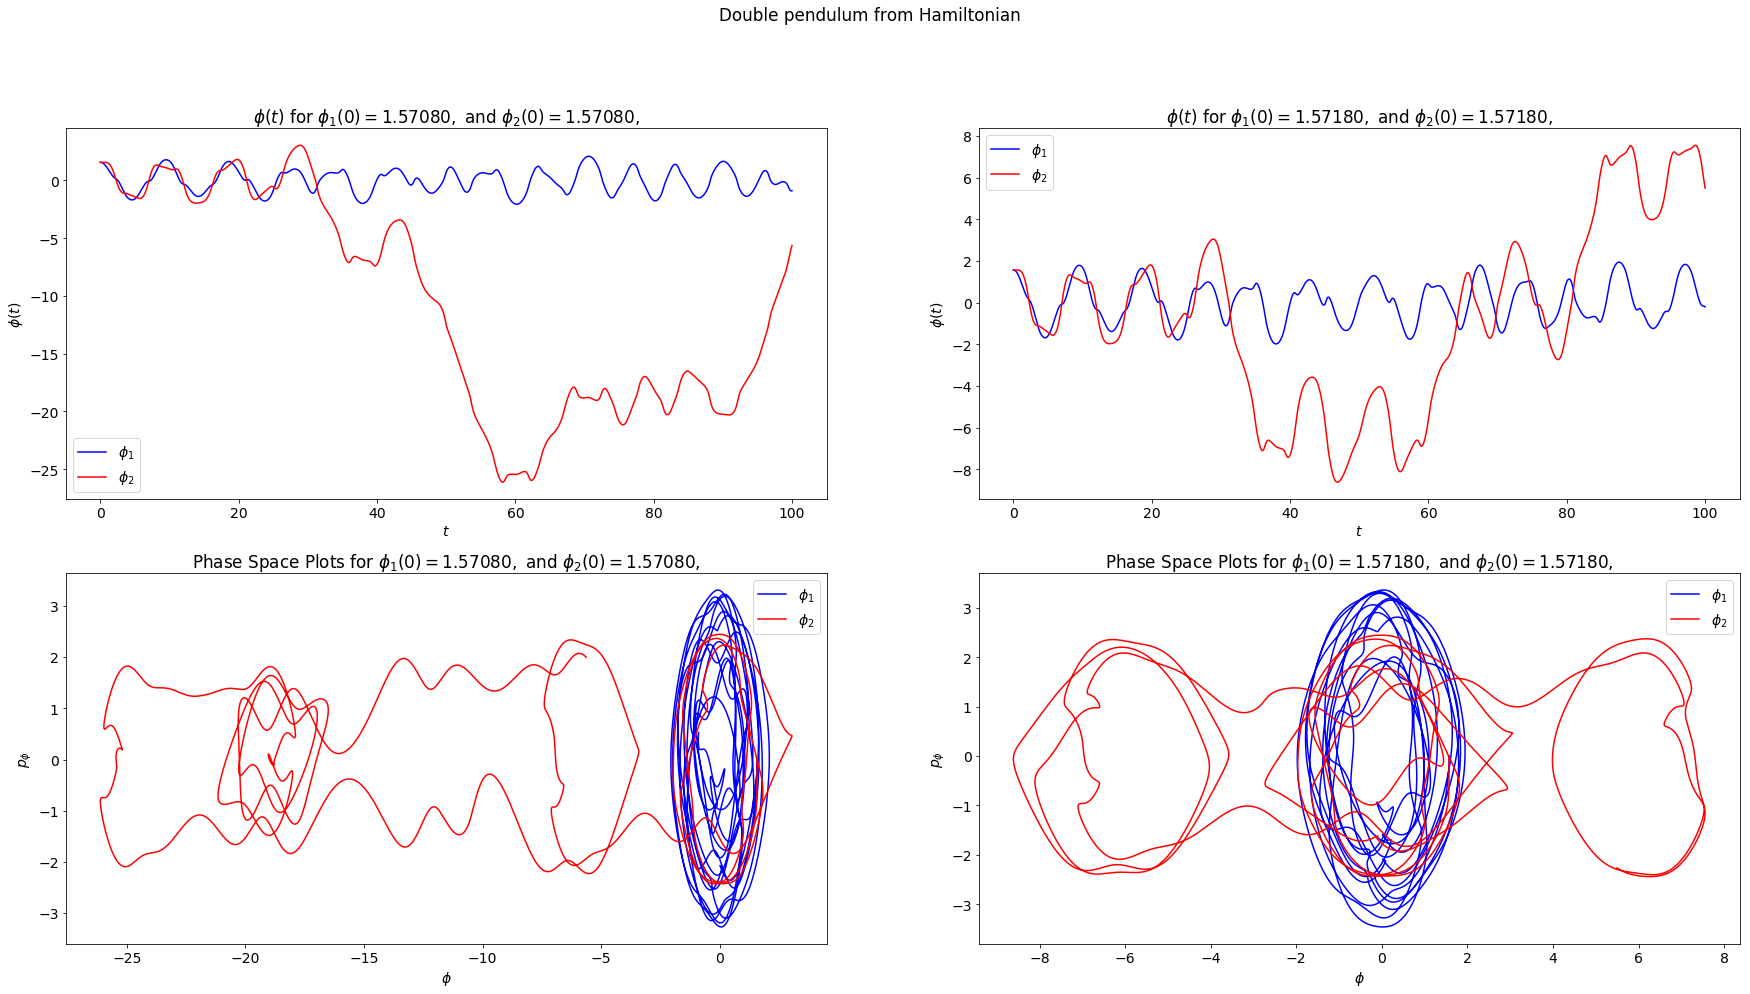

In [9]:
fig = plt.figure(figsize=(30,15))
overall_title = 'Double pendulum from Hamiltonian  '
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(2,2,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=rf'$\phi_1$', 
            title=rf'$\phi(t)$ for $\phi_1(0) = {phi1a_0:.5f},$ and $\phi_2(0) = {phi2a_0:.5f},$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], phi2_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=rf'$\phi_2$', 
            ax=ax_a) 

ax_b = fig.add_subplot(2,2,2) 

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=rf'$\phi_1$', 
            title=rf'$\phi(t)$ for $\phi_1(0) = {phi1b_0:.5f},$ and $\phi_2(0) = {phi2b_0:.5f},$', 
            ax=ax_b)

plot_y_vs_x(t_pts[start : stop], phi2_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=rf'$\phi_2$', 
            ax=ax_b) 









ax_c = fig.add_subplot(2,2,3) 

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1_1[start : stop], p_phi1_1[start : stop], 
            axis_labels=phase_space_labels, 
            color='blue',
            label=rf'$\phi_1$', 
            title=rf'Phase Space Plots for $\phi_1(0) = {phi1a_0:.5f},$ and $\phi_2(0)={phi2a_0:.5f},$', 
            ax=ax_c)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2_1[start : stop], p_phi2_1[start : stop], 
            axis_labels=phase_space_labels, 
            color='red',
            label=rf'$\phi_2$',  
            ax=ax_c)

ax_d = fig.add_subplot(2,2,4) 

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1_2[start : stop], p_phi1_2[start : stop], 
            axis_labels=phase_space_labels, 
            color='blue',
            label=rf'$\phi_1$', 
            title=rf'Phase Space Plots for $\phi_1(0) = {phi1b_0:.5f},$ and $\phi_2(0)={phi2b_0:.5f},$', 
            ax=ax_d)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2_2[start : stop], p_phi2_2[start : stop], 
            axis_labels=phase_space_labels, 
            color='red',
            label=rf'$\phi_2$', 
            ax=ax_d)


These four plots show the angle of the pendulum's arms vs. time on the top and the phase space on the bottom.  The left side and right side have inital conditions that differ by 0.001, as shown.  They both very quckly diverge into very different motions, as shown.  However, this does not guarnatee chaotic motion.   To check if the motion is chaotic, we want to look at the difference in phi's as time goes on.  To do this, we can plot the diffrenece on a logorithmic scale.

(<matplotlib.axes._subplots.AxesSubplot at 0x15177697f0>,
 <matplotlib.lines.Line2D at 0x1516ba9d30>)

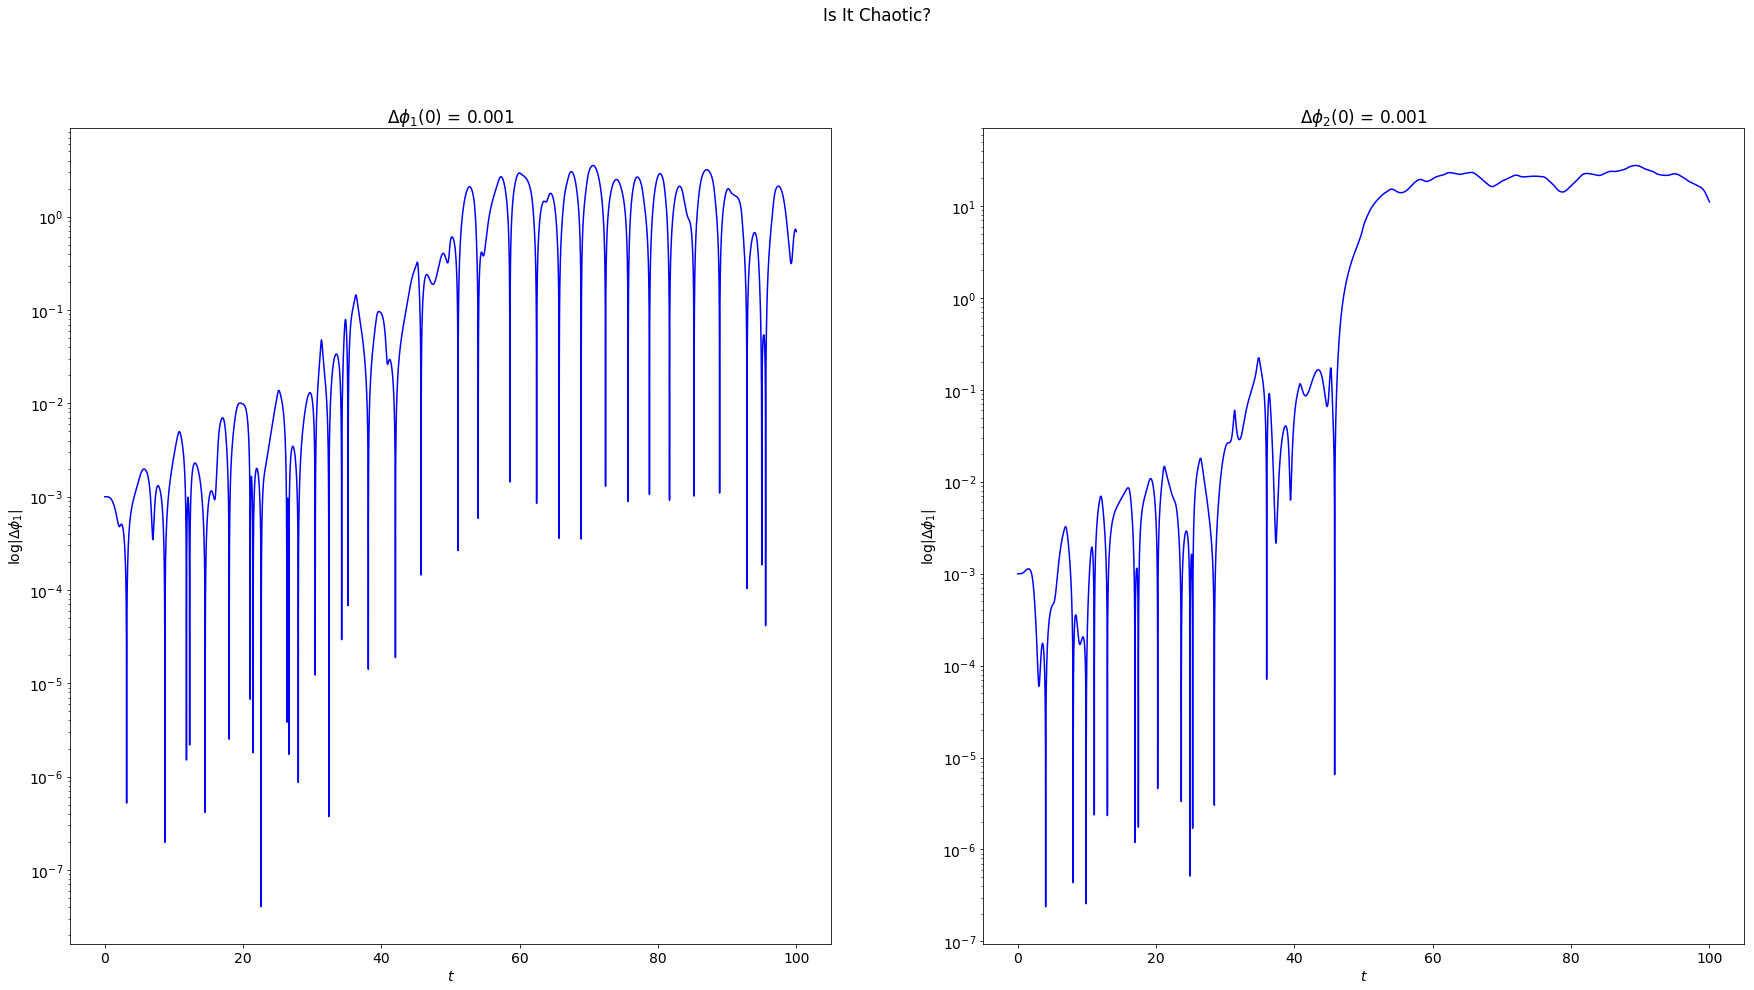

In [10]:
fig = plt.figure(figsize=(30,15))
overall_title = 'Is It Chaotic? '
fig.suptitle(overall_title, va='baseline')


ax_a = fig.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], diff_phi1[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label=None, 
            title=rf'$\Delta\phi_1(0)$ = {abs(phi1a_0-phi1b_0):.3f}', 
            ax=ax_a)

ax_a = fig.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], diff_phi2[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label=None, 
            title=rf'$\Delta\phi_2(0)$ = {abs(phi2a_0-phi2b_0):.3f}', 
            ax=ax_a)


We see that the difference in $\phi$s does increase on this logorithmic scale.  Thus, we have chaotic motion.